In [16]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark3.02
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz

In [17]:
# unzip it
!tar xf spark-3.0.2-bin-hadoop3.2.tgz

In [18]:
# install pyspark 
!pip install pyspark

In [19]:
# install findspark
!pip install -q findspark

In [20]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [21]:
import findspark
findspark.init()

In [22]:
findspark.find()

'/content/spark-3.0.2-bin-hadoop3.2'

In [23]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [24]:
spark

In [25]:
#/content/drive/MyDrive/academic/l4s2/big data/data2.csv

In [26]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-04-01 17:47:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.55.225.227, 3.208.247.60, 174.129.26.222, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.55.225.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  14.06M  53.1MB/s    in 0.3s    

2021-04-01 17:47:12 (53.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [14746350/14746350]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://0b510bc0ce36.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99"

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/academic/l4s2/big data/d.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
df = spark.read.csv("/content/drive/MyDrive/academic/l4s2/big data/d2.csv", header=True, inferSchema=True)
df.head()

Row(Url='https://ikman.lk//en/ad/suzuki-wagon-r-fz-safety-2015-for-sale-gampaha-66', Title='Suzuki Wagon R FZ Safety 2015', Date='2 Mar 7:04 AM', District='Negombo', Area='Gampaha', Price=3200000, Brand='Suzuki', Model='Wagon R FZ', Trim/Edition='Safety', ModelYear=2015, Condition='Used', Transmission='Automatic', BodyType='Hatchback', FuelType='Hybrid', EngineCapacity='650 cc', Millage='63,000 km', Decription="['<p>Dvd, Tv , Reverse camera, Dual Air Bags, Abs, multi function, Alloy wheels, push start, safety brake', 'Mint condition', 'First owner', 'All service records available', 'Price can be negotiable after inspection</p>']")

In [38]:
df.printSchema()

root
 |-- Url: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Trim/Edition: string (nullable = true)
 |-- ModelYear: integer (nullable = true)
 |-- Condition: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- BodyType: string (nullable = true)
 |-- FuelType: string (nullable = true)
 |-- EngineCapacity: string (nullable = true)
 |-- Millage: string (nullable = true)
 |-- Decription: string (nullable = true)



In [41]:
df.show(5)

+--------------------+--------------------+--------------+-------------+-------+--------+-------------+----------+-------------------+---------+---------+------------+---------+--------+--------------+---------+--------------------+
|                 Url|               Title|          Date|     District|   Area|   Price|        Brand|     Model|       Trim/Edition|ModelYear|Condition|Transmission| BodyType|FuelType|EngineCapacity|  Millage|          Decription|
+--------------------+--------------------+--------------+-------------+-------+--------+-------------+----------+-------------------+---------+---------+------------+---------+--------+--------------+---------+--------------------+
|https://ikman.lk/...|Suzuki Wagon R FZ...| 2 Mar 7:04 AM|      Negombo|Gampaha| 3200000|       Suzuki|Wagon R FZ|             Safety|     2015|     Used|   Automatic|Hatchback|  Hybrid|        650 cc|63,000 km|['<p>Dvd, Tv , Re...|
|https://ikman.lk/...|Honda Vezel Z Ora...|25 Mar 9:08 PM|Mount Lavi

In [43]:
selected = df.select("Date","District","Area","Price","Brand","Price", "Model", "Trim/Edition", "ModelYear", "Condition", "Transmission", "BodyType","FuelType", "FuelType", "EngineCapacity", "Millage").show(5)

+--------------+-------------+-------+--------+-------------+--------+----------+-------------------+---------+---------+------------+---------+--------+--------+--------------+---------+
|          Date|     District|   Area|   Price|        Brand|   Price|     Model|       Trim/Edition|ModelYear|Condition|Transmission| BodyType|FuelType|FuelType|EngineCapacity|  Millage|
+--------------+-------------+-------+--------+-------------+--------+----------+-------------------+---------+---------+------------+---------+--------+--------+--------------+---------+
| 2 Mar 7:04 AM|      Negombo|Gampaha| 3200000|       Suzuki| 3200000|Wagon R FZ|             Safety|     2015|     Used|   Automatic|Hatchback|  Hybrid|  Hybrid|        650 cc|63,000 km|
|25 Mar 9:08 PM|Mount Lavinia|Colombo| 5790000|        Honda| 5790000|     Vezel|Z Orange Gold Batch|     2014|     Used|   Automatic|SUV / 4x4|  Hybrid|  Hybrid|      1,500 cc|59,000 km|
|27 Mar 2:16 PM|        Kotte|Colombo| 4450000|        Honda

In [47]:
print((df.count(), len(df.columns)))

(6797, 17)


In [46]:
df.groupBy('ModelYear').count().orderBy('count', ascending=False).show()

+---------+-----+
|ModelYear|count|
+---------+-----+
|     2015|  741|
|     2017|  651|
|     2016|  558|
|     2018|  494|
|     2014|  486|
|     2012|  341|
|     2013|  334|
|     2011|  270|
|     2007|  261|
|     2019|  234|
|     2008|  198|
|     2010|  149|
|     2003|  140|
|     2006|  137|
|     2000|  137|
|     2001|  110|
|     1997|  104|
|     2020|  100|
|     2004|   98|
|     2002|   96|
+---------+-----+
only showing top 20 rows



In [105]:
df.groupBy('BodyType').count().orderBy('count', ascending=False).show()

+-------------+-----+
|     BodyType|count|
+-------------+-----+
|    Hatchback| 2542|
|       Saloon| 2265|
|    SUV / 4x4| 1407|
|Station wagon|  353|
|          MPV|  129|
| Coupé/Sports|   52|
|  Convertible|   49|
+-------------+-----+



In [48]:
df.groupBy('Area').count().orderBy('count', ascending=False).show()

+------------+-----+
|        Area|count|
+------------+-----+
|     Colombo| 3267|
|     Gampaha| 1447|
|  Kurunegala|  350|
|    Kalutara|  296|
|       Kandy|  285|
|       Galle|  204|
|      Matara|  189|
|    Puttalam|  138|
|     Kegalle|  136|
|   Ratnapura|  115|
|Anuradhapura|   73|
|      Matale|   59|
|  Hambantota|   55|
|      Ampara|   50|
|     Badulla|   44|
|  Monaragala|   22|
|  Batticaloa|   21|
| Polonnaruwa|   15|
|Nuwara Eliya|    9|
| Trincomalee|    8|
+------------+-----+
only showing top 20 rows



In [67]:
from pyspark.sql.functions import count, avg
from pyspark.sql.functions import desc

In [69]:
pdf = df.groupBy("Brand", "Model").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).show()

+-------------+-------------------+--------------------+--------+
|        Brand|              Model|          avg(Price)|count(1)|
+-------------+-------------------+--------------------+--------+
|   Land Rover|   Range Rover PHEV|              6.97E7|       2|
|       Hummer|                 H2|               5.9E7|       3|
|   Land Rover|        Range Rover|4.5661463414634146E7|      41|
|Mercedes Benz|           GLE 300D|          3.834375E7|       8|
|       Toyota|Land Cruiser Sahara|  3.77608552631579E7|      76|
|          BMW|               740d|              3.75E7|       1|
|       Jaguar|             F-Pace|              3.55E7|       1|
|   Land Rover|  Range Rover Velar|3.5483333333333336E7|       6|
|   Land Rover|        Other Model|             3.475E7|       1|
|   Land Rover|  Range Rover Sport|          3.423125E7|      16|
|Mercedes Benz|               S400|               3.3E7|       1|
|Mercedes Benz|               S500|            3.2625E7|       4|
|         

In [72]:
pdf = df.groupBy("Brand", "Model").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).toPandas()

In [ ]:
df.groupBy('ModelYear').count().orderBy('count', ascending=False).show()

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(15,15)})

In [74]:
pdf.head()

,Brand,Model,avg(Price),count(1)
0,Land Rover,Range Rover PHEV,6.970000e+07,2
1,Hummer,H2,5.900000e+07,3
2,Land Rover,Range Rover,4.566146e+07,41
3,Mercedes Benz,GLE 300D,3.834375e+07,8
4,Toyota,Land Cruiser Sahara,3.776086e+07,76


[Text(0.5, 1.0, 'Top Twenty')]

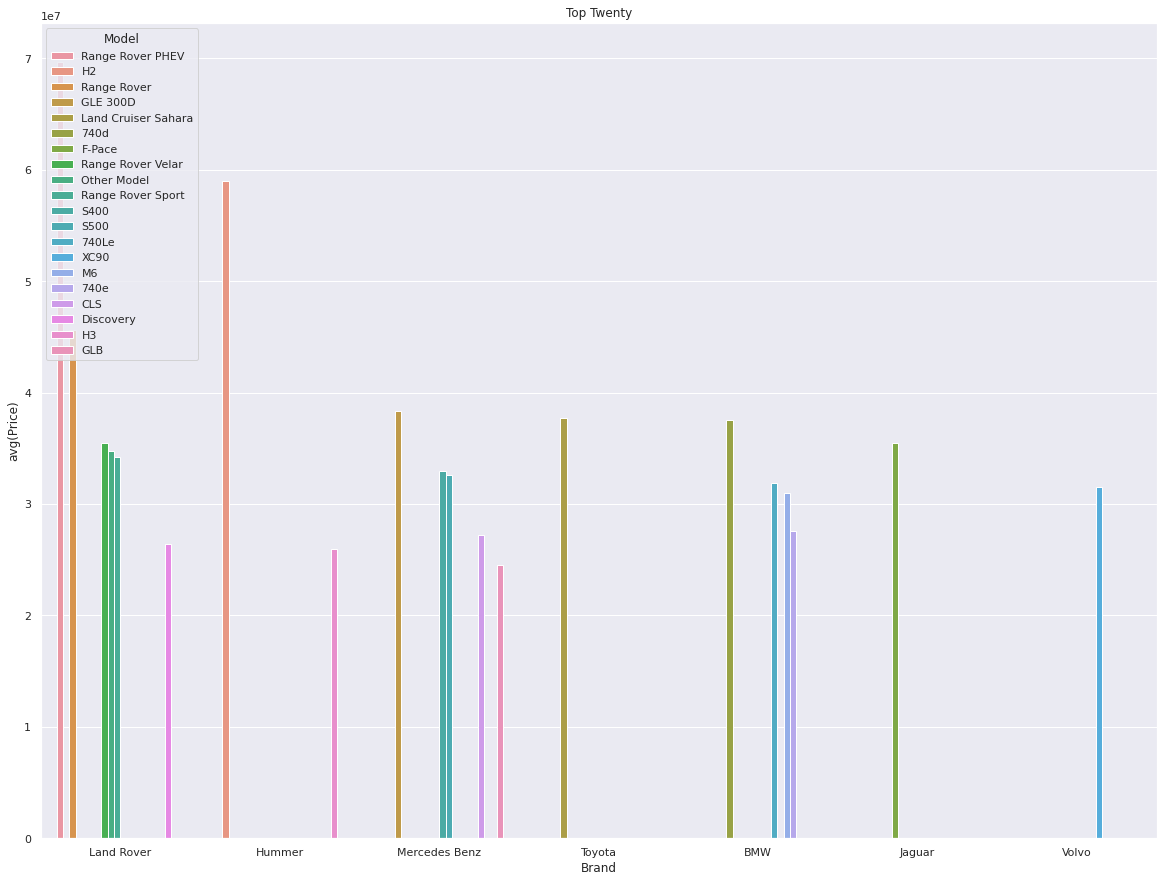

In [92]:
sns.barplot(x="Brand", y="avg(Price)", hue="Model", data=pdf.iloc[:20]).set(title="Top Twenty")
# g.fig.autofmt_xdate()
# fig.set_figwidth(20.27)
# g.fig.set_figheight(11.7)    

In [96]:
pdf = df.groupBy("Model", "ModelYear").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).show()

+-------------------+---------+--------------------+--------+
|              Model|ModelYear|          avg(Price)|count(1)|
+-------------------+---------+--------------------+--------+
|Land Cruiser Sahara|     2020|              7.97E7|       5|
|   Range Rover PHEV|     2019|              7.75E7|       1|
|                 H2|     2005|              6.75E7|       1|
|        Range Rover|     2019|6.6691333333333336E7|      15|
|           Defender|     2020|              6.65E7|       1|
|   Range Rover PHEV|     2018|              6.19E7|       1|
|                 H2|     2009|               6.0E7|       1|
|Land Cruiser Sahara|     2016|5.1291666666666664E7|      12|
|        Range Rover|     2018|5.0077777777777776E7|       9|
|               S300|     2015|               5.0E7|       1|
|                 H2|     2007|              4.95E7|       1|
|Land Cruiser Sahara|     2018|              4.75E7|       2|
| Land Cruiser Prado|     2020|4.7333333333333336E7|       3|
|Land Cr

In [97]:
pdf = df.groupBy("Model", "ModelYear").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).toPandas()

[Text(0.5, 1.0, 'Top Twenty')]

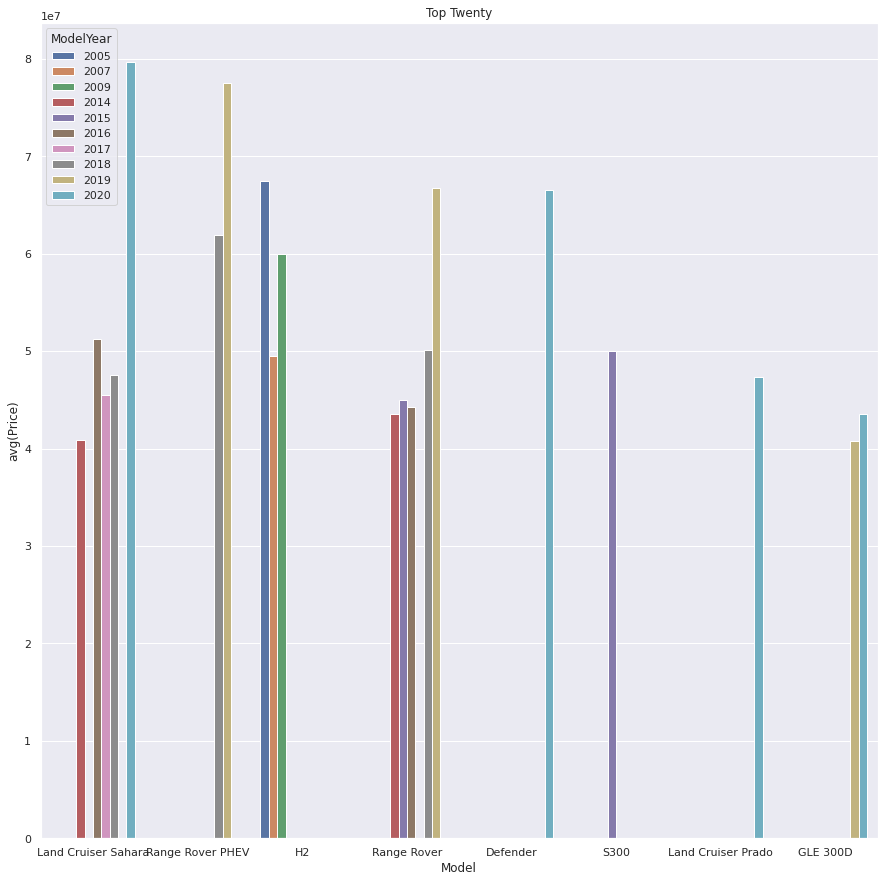

In [98]:
sns.barplot(x="Model", y="avg(Price)", hue="ModelYear", data=pdf.iloc[:20]).set(title="Top Twenty")

In [100]:
# Millage
pdf = df.groupBy("Model", "Condition").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).show()

+-------------------+-------------+----------+--------+
|              Model|    Condition|avg(Price)|count(1)|
+-------------------+-------------+----------+--------+
|        Range Rover|          New| 8.35125E7|       4|
|Land Cruiser Sahara|          New|    7.97E7|       5|
|   Range Rover PHEV|          New|    7.75E7|       1|
|           Defender|          New|    6.65E7|       1|
|        Range Rover|Reconditioned|  6.2294E7|       5|
|   Range Rover PHEV|         Used|    6.19E7|       1|
|                 H2|         Used|     5.9E7|       3|
|               S300|          New|     5.0E7|       1|
|  Range Rover Velar|Reconditioned|     4.6E7|       1|
|           GLE 300D|          New|  4.2875E7|       4|
|          Discovery|          New|   4.275E7|       2|
|  Range Rover Sport|Reconditioned|    3.95E7|       1|
|        Range Rover|         Used|3.833125E7|      32|
|               740d|Reconditioned|    3.75E7|       1|
|              740Le|Reconditioned|    3.75E7|  

In [101]:
pdf = df.groupBy("Model", "Condition").agg(avg("Price"), count("*")).sort(desc("avg(Price)")).toPandas()

[Text(0.5, 1.0, 'Top Twenty')]

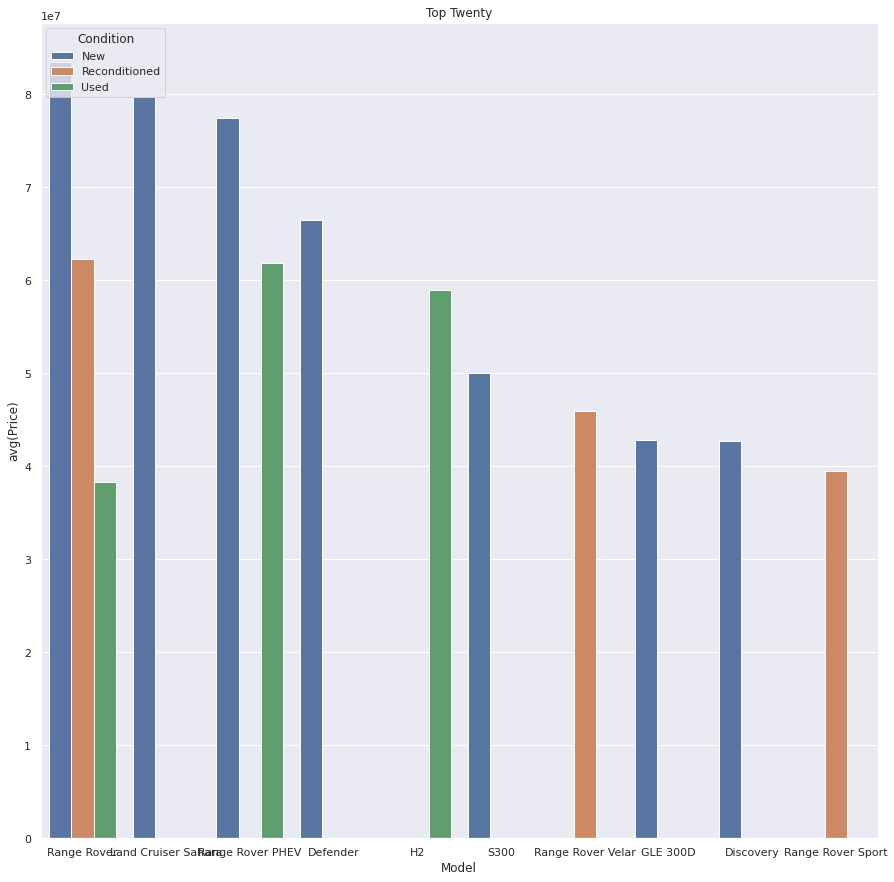

In [104]:
sns.barplot(x="Model", y="avg(Price)", hue="Condition", data=pdf.iloc[:13]).set(title="Top Twenty")